In [1]:
# Cell 1 - Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error

%matplotlib inline


In [9]:
# Cell 2 - Load dataset
# Replace 'loan_data.csv' with your dataset path
df = pd.read_csv('loan_approval_dataset.csv')

# clean column names (remove spaces)
df.columns = df.columns.str.strip()

# Quick look
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Shape of dataset: (4269, 13)

Missing values:
 loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

Loan Status distribution:
 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


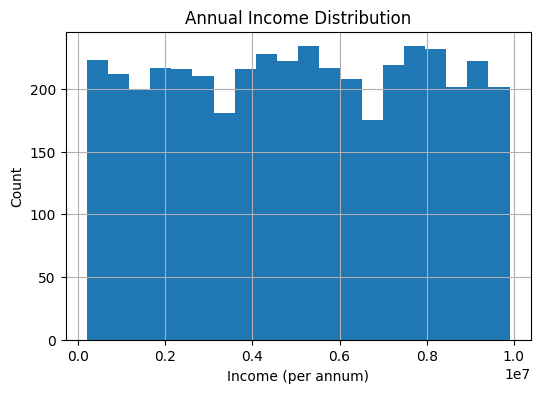

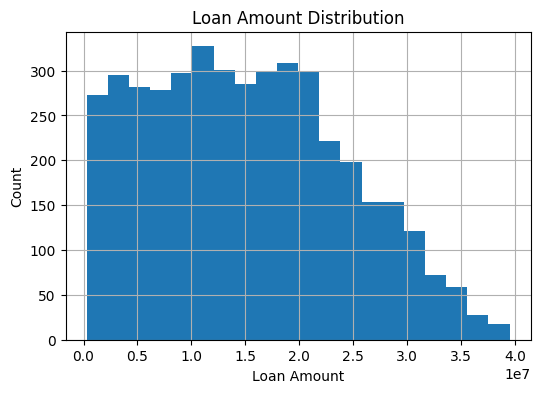

In [10]:
# Cell 3 - Basic EDA
# =======================
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nLoan Status distribution:\n", df['loan_status'].value_counts())

# Visualizations
df['income_annum'].hist(bins=20, figsize=(6,4))
plt.title('Annual Income Distribution')
plt.xlabel('Income (per annum)')
plt.ylabel('Count')
plt.show()

df['loan_amount'].hist(bins=20, figsize=(6,4))
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()


In [11]:
# Cell 4 - Handle missing values
num_cols = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
            'residential_assets_value', 'commercial_assets_value',
            'luxury_assets_value', 'bank_asset_value']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

cat_cols = ['no_of_dependents', 'education', 'self_employed']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing after filling:\n", df.isnull().sum())



Missing after filling:
 loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


/tmp/ipython-input-530934061.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-530934061.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [16]:
# Cell 5 - Encode categorical features
le = LabelEncoder()
for col in cat_cols + ['loan_status']:
    df[col] = le.fit_transform(df[col])


In [17]:
# Cell 6 - Split features and targets

X = df.drop(['loan_status', 'loan_amount', 'loan_id'], axis=1)

# Target 1 - Loan Approval (classification)
y_class = df['loan_status']

# Target 2 - Loan Amount (regression)
y_reg = df['loan_amount']


In [18]:
# Cell 7 - Train/test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

In [19]:
# Cell 8 - Feature scaling
scaler = StandardScaler()
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.transform(X_test_r)

In [20]:
# Cell 9 - Logistic Regression for Loan Approval

clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(X_train_c_scaled, y_train_c)

y_pred_c = clf.predict(X_test_c_scaled)
acc = accuracy_score(y_test_c, y_pred_c)
print(f"\nLoan Approval Accuracy: {acc*100:.2f}%")



Loan Approval Accuracy: 91.92%


Confusion Matrix:
 [[506  25]
 [ 44 279]]


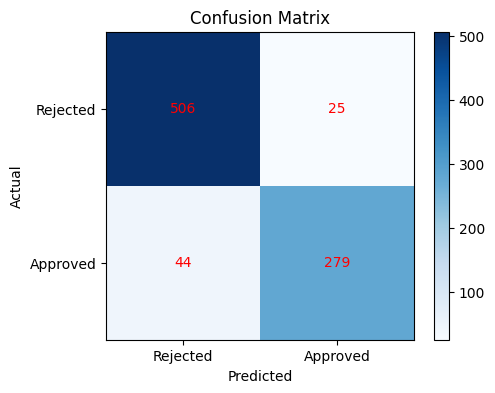

In [21]:
# Cell 10 - Confusion matrix

cm = confusion_matrix(y_test_c, y_pred_c)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()
plt.xticks([0,1], ['Rejected','Approved'])
plt.yticks([0,1], ['Rejected','Approved'])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i,j], ha='center', va='center', color='red')
plt.show()


In [23]:
# Cell 11 - Linear Regression for Loan Amount

reg = LinearRegression()
reg.fit(X_train_r_scaled, y_train_r)

y_pred_r = reg.predict(X_test_r_scaled)
r2 = r2_score(y_test_r, y_pred_r)
rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
print(f"\nLoan Amount Prediction R²: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")


Loan Amount Prediction R²: 0.85
RMSE: 3451901.16


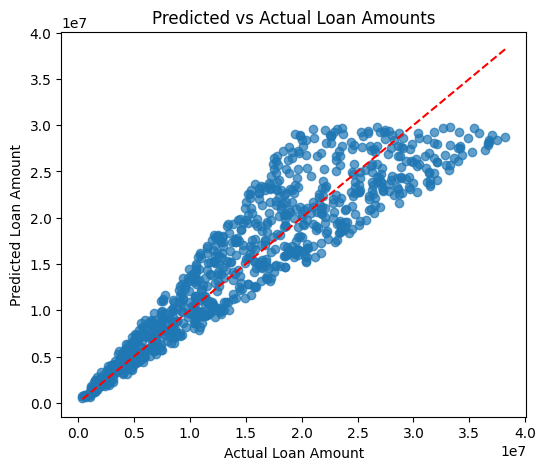

In [24]:
# Cell 12 - Plot predicted vs actual loan amounts

plt.figure(figsize=(6,5))
plt.scatter(y_test_r, y_pred_r, alpha=0.7)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--')
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Predicted vs Actual Loan Amounts")
plt.show()